In [31]:
import numpy as np
import pylab as pl
from scipy.optimize import curve_fit

 $\lambda$ =  687.783217155862 $\pm$ 7.14702259640822


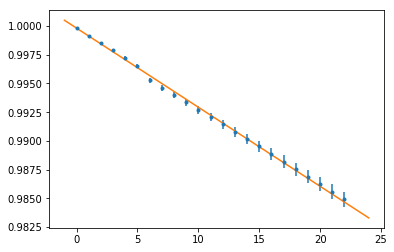

In [ ]:
def lineare (x, m, q):
    return m*x + q

def weighted_average(y, dy):
    """Weighted average of a list of measurement.
    """
    S = Sy = 0.
    for yi, dyi in zip(y, dy):
        wi = (1./dyi)**2.
        S += wi
        Sy += wi*yi
    q = Sy/S
    dq = (1./S)**0.5
    return q, dq

#DATI
D = 2.22   
dD = 0.05      #metri
dh = 1         #mm 
passo_ret = 1  #mm assunto senza errore
lung_onda = np.array([0.]*3)
d_lung_onda = np.array([0.]*3)
nome = np.array(['dati/A1.txt', 'dati/A2.txt', 'dati/A3.txt'])
immagini = np.array (['immagini/fit_A1.eps', 'immagini/fit_A2.eps', 'immagini/fit_A3.eps', 'immagini/media'])
valore_teorico = 632.8   #nm lunghezza d'onda nominale del laser HeNe

for i in range (0,3):
    h = np.loadtxt ( nome[i] , unpack = 'True')
    m = np.linspace (0, len(h)-1, len(h) , dtype = int ) #m parte da zero, il primo punto che abbiamo preso è quello riflesso
    #MASK SU DATI PRIMA PARTE
    """
    mask = (m < 4) | (m > 10 )
    m = m[mask]
    print (m)
    mask = (h < 166) | (h > 270 )
    h = h[mask]
    print(h)
    """
    tan_theta_n = (h/D)/1000.
    d_tan_theta_n = tan_theta_n*np.sqrt( (dh/h)**2. + (dD/D)**2. )
    sin_theta_d = 1./np.sqrt(1. + (tan_theta_n)**2. )
    d_sin_theta_d = ( ( 1. + (tan_theta_n)**2. )**(-1.5) )*tan_theta_n*d_tan_theta_n
    #print ( (d_sin_theta_d/sin_theta_d)*100. ) 
    popt, pcov = curve_fit (lineare, m , sin_theta_d , sigma = d_sin_theta_d , absolute_sigma = 'True' ) #absolute sigma?
    print ( ' $\lambda$ = ', (-1.)*popt[0]*10**6. , '$\pm$',  np.sqrt( pcov.diagonal() )[0]*10**6. ) 
    pl.errorbar (m , sin_theta_d , d_sin_theta_d, fmt = '.')
    x = np.linspace (-1. , len(h) + 1 , 1000)
    pl.plot ( x, lineare (x, *popt) )
    #pl.savefig(immagini[i],format='eps')
    pl.show()
    
    
    #RESIDUI NORMALIZZATI
    pl.errorbar( m, ( sin_theta_d - lineare (m, *popt) )/d_sin_theta_d , d_sin_theta_d/d_sin_theta_d , fmt = '.')  
    pl.show()
    
    #calcolo chi_2 serve??
    
    lung_onda[i] = (-1.)*popt[0]*10**6.
    d_lung_onda[i] = np.sqrt( pcov.diagonal() )[0]*10**6.
    #print ( (d_sin_theta_d/sin_theta_d)*10**3. )
    
#CALCOLO MEDIA 
media, d_media = weighted_average( lung_onda, d_lung_onda)
print ( 'media = ', media, '$\pm$',  d_media )

n = np.array ([1,2,3])
pl.errorbar ( n, lung_onda, d_lung_onda, fmt = '.' )
pl.plot ( n, np.array([media]*3) )
pl.plot ( n, np.array([media + d_media]*3), linestyle = 'dashed' )
pl.plot ( n, np.array([media - d_media]*3), linestyle = 'dashed')    #come si fa insieme? risolvere problema
pl.plot ( n, np.array([valore_teorico]*3), linestyle = '-.' )      #sembra che nn prende dash-dot e qualcosa nn funzionava...
#pl.savefig (immagini[3], format = 'eps')
pl.show()



    
    




Perchè A_1 sembra totalmente scazzato????? A
SOVRASTIMA ERRORI? GUARDATE GRAFICO DEI RESIDUI, CMQ PER I PRIMI DATI NON TORNA NIENTE!
Nell'ultimo grafico linea punto-linea viola è il valore teorico, la linea arancione è il valore medio e le linee tratteggiate vicine i valori a 1 deviazione standard. Ho provato anche a fare qualche mask per filtrare i dati del primo set di dati ma nnt.. 
